In [23]:
import tensorflow as tf

import numpy as np
import os
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 

In [24]:
path_to_file = tf.keras.utils.get_file('songs', 'https://raw.githubusercontent.com/tomoko-tiba/CodingThreeFinal/main/songs')

In [29]:
tokenizer = Tokenizer()
data = open(path_to_file, 'rb').read().decode(encoding='utf-8')
cleaned_data = data.replace("\r", "")
corpus = cleaned_data.lower().split("\n")

#corpus[2090:2101]
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#tokenizer.word_index
print(tokenizer.word_index)
print(total_words)


{'you': 1, 'i': 2, 'the': 3, 'and': 4, 'me': 5, 'to': 6, 'a': 7, 'in': 8, 'it': 9, 'my': 10, 'your': 11, 'like': 12, 'of': 13, 'that': 14, 'oh': 15, 'but': 16, "i'm": 17, 'all': 18, 'on': 19, 'know': 20, 'we': 21, 'this': 22, 'be': 23, 'is': 24, 'was': 25, "it's": 26, 'so': 27, 'just': 28, 'for': 29, 'when': 30, "don't": 31, 'never': 32, 'what': 33, 'now': 34, "you're": 35, 'with': 36, 'up': 37, 'time': 38, 'love': 39, 'at': 40, 'if': 41, 'no': 42, 'back': 43, 'one': 44, "'cause": 45, 'out': 46, 'do': 47, 'ooh': 48, 'down': 49, 'they': 50, 'say': 51, 'were': 52, 'might': 53, 'think': 54, 'got': 55, 'been': 56, 'see': 57, 'are': 58, 'could': 59, 'not': 60, 'go': 61, 'can': 62, 'also': 63, 'there': 64, 'wanna': 65, 'yeah': 66, 'he': 67, 'come': 68, 'want': 69, "can't": 70, 'right': 71, "i'll": 72, 'ever': 73, 'said': 74, 'have': 75, 'get': 76, 'here': 77, 'how': 78, 'had': 79, 'baby': 80, 'better': 81, 'did': 82, 'about': 83, 'take': 84, 'from': 85, 'would': 86, 'still': 87, 'night': 88,

In [31]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [40]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(predictors, label, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
2178/2178 [==============================] - 67s 30ms/step - loss: 5.7996 - accuracy: 0.0807
Epoch 2/100
2178/2178 [==============================] - 66s 30ms/step - loss: 4.7744 - accuracy: 0.1652
Epoch 3/100
2178/2178 [==============================] - 66s 30ms/step - loss: 4.1149 - accuracy: 0.2411
Epoch 4/100
2178/2178 [==============================] - 66s 30ms/step - loss: 3.5862 - accuracy: 0.3135
Epoch 5/100
2178/2178 [==============================] - 66s 30ms/step - loss: 3.1554 - accuracy: 0.3781
Epoch 6/100
2178/2178 [==============================] - 69s 31ms/step - loss: 2.7986 - accuracy: 0.4354
Epoch 7/100
2178/2178 [==============================] - 68s 31ms/step - loss: 2.5049 - accuracy: 0.4844
Epoch 8/100
2178/2178 [==============================] - 66s 30ms/step - loss: 2.2569 - accuracy: 0.5299
Epoch 9/100
2178/2178 [==============================] - 66s 30ms/step - loss: 2.0486 - accuracy: 0.5673
Epoch 10/100
2178/2178 [==============================]

2178/2178 [==============================] - 62s 29ms/step - loss: 0.6918 - accuracy: 0.8083
Epoch 79/100
2178/2178 [==============================] - 62s 28ms/step - loss: 0.6920 - accuracy: 0.8082
Epoch 80/100
2178/2178 [==============================] - 62s 28ms/step - loss: 0.6934 - accuracy: 0.8075
Epoch 81/100
2178/2178 [==============================] - 62s 29ms/step - loss: 0.6911 - accuracy: 0.8079
Epoch 82/100
2178/2178 [==============================] - 62s 29ms/step - loss: 0.6916 - accuracy: 0.8069
Epoch 83/100
2178/2178 [==============================] - 62s 29ms/step - loss: 0.6893 - accuracy: 0.8079
Epoch 84/100
2178/2178 [==============================] - 63s 29ms/step - loss: 0.6899 - accuracy: 0.8077
Epoch 85/100
2178/2178 [==============================] - 63s 29ms/step - loss: 0.6884 - accuracy: 0.8079
Epoch 86/100
2178/2178 [==============================] - 63s 29ms/step - loss: 0.6878 - accuracy: 0.8075
Epoch 87/100
2178/2178 [==============================] - 6

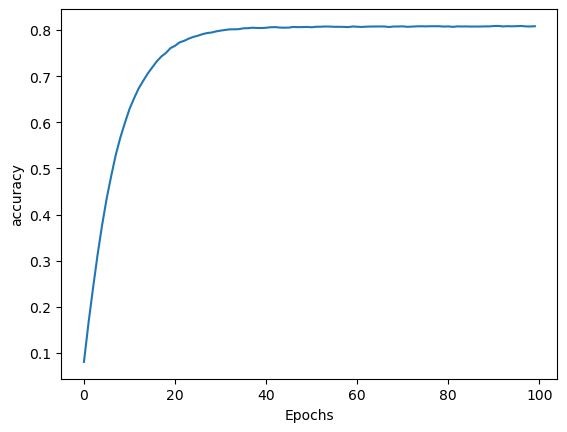

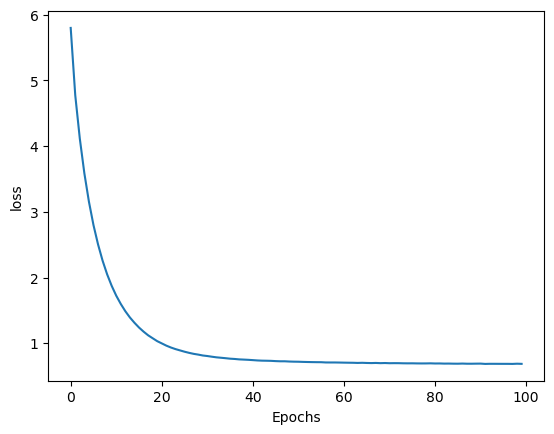

In [41]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [45]:
seed_text = "I hate you"
next_words = 60

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted_probabilities = model.predict(token_list, verbose=0)
    predicted_class = np.argmax(predicted_probabilities)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_class:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

I hate you no no body no no no no no mistakes mistakes in mistakes gravity street place be tuesday seventeen in you but i the one you right me right around you the one find bleedin' moving through fight taken break break down break a side oh thief oh speech lifeless to be incandescent on bond tracks just the one on places
